In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data

In [74]:
df = pd.read_csv("../vacancies.csv")
df.head()

,applications,company,experience,salary,tags,views
0,11,Develux,5,NaN,NaN,40
1,0,Particles Global,5,NaN,"PostgreSQL,Python,API,Linux,Unix",14
2,19,Techstack,2,NaN,NaN,62
3,0,Pozotron,5,NaN,"Python,Postgre SQL,Django,Docker,Kubernetes,Ma...",16
4,7,SD Solutions,5,NaN,"Python,AWS",39


# Data cleaning and wrangling

In [75]:
df = df[df["tags"].notna()]

In [76]:
df[df.duplicated(subset=["company", "experience", "salary", "tags"], keep=False)]

,applications,company,experience,salary,tags,views
20,17,OSF Digital,2,NaN,"Python,API,Agile,Fluent English",87
44,1,SD Solutions,5,NaN,Python,17
46,2,SD Solutions,5,NaN,Python,21
193,6,:DTeam,3,NaN,"Python,Django,Django Rest Framework,Docker,API...",68
210,1,8allocate,5,NaN,"Python,Node.js,ML,OCR,AWS",16
237,33,OSF Digital,2,NaN,"Python,API,Agile,Fluent English",165
251,11,:DTeam,3,NaN,"Python,Django,Django Rest Framework,Docker,API...",67
276,1,8allocate,5,NaN,"Python,Node.js,ML,OCR,AWS",20


In [77]:
df.drop_duplicates(subset=["company", "experience", "salary", "tags"], inplace=True, ignore_index=True)

In [78]:
df["tags_category"] = df["tags"].astype("category")
df["tags_category"] = df["tags_category"].str.lower() \
    .str.replace(r"python\d", "Python", regex=True) \
    .str.replace(" / ", ",") \
    .str.replace("/", ",") \
    .str.replace("-", " ") \
    .str.replace(r"postgre[a-z]*", "PostgreSQL", regex=True) \
    .str.replace(r"node.*js|node", "Node.js", regex=True) \
    .str.replace(r"mongo.*db|mongo", "MongoDB", regex=True) \
    .str.replace(r"react.*js|react", "React.js", regex=True) \
    .str.replace(r"\bml\b", "Machine Learning", regex=True) \
    .str.replace(r"restful api|restapi|api rest", "REST API", regex=True) \
    .str.replace("postgresql sql", "PostgreSQL") \
    .str.replace(r"django rest(?! framework)|drf", "Django Rest Framework", regex=True) \
    .str.replace("fast api", "FastAPI") \
    .str.replace(r"aws [a-z]+", "AWS", regex=True) \
    .str.replace(r"back end|backend development", "Backend", regex=True) \
    .str.replace(r"docer|docker compose", "Docker", regex=True) \
    .str.replace(r"google cloud platform|gcp", "Google Cloud", regex=True) \
    .str.replace("java script", "Javascript") \
    .str.replace("my sql", "MySQL") \
    .str.replace("azure cloud", "Azure")

In [79]:
tags_test = df["tags_category"].str.get_dummies(",")
top_tags = tags_test.sum().sort_values(ascending=False).head(25)
top_columns = top_tags.index.to_list()

In [80]:
df_tags_test = tags_test[top_columns]
df = df.join(df_tags_test)

In [81]:
df = df.drop(columns=["tags", "tags_category"])
df.head()

,applications,company,experience,salary,views,python,django,aws,PostgreSQL,React.js,...,Google Cloud,javascript,nosql,mysql,celery,Django Rest Framework,azure,git,redis,REST API
0,0,Particles Global,5,NaN,14,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Pozotron,5,NaN,16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,SD Solutions,5,NaN,39,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,SKILLUP,3,NaN,37,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,incoalliance,3,NaN,35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analysis

In [82]:
df[["salary", *top_columns]].corr()["salary"].sort_values(ascending=False)

salary                   1.000000
machine learning         0.514011
aws                      0.141801
python                   0.101589
PostgreSQL               0.009670
linux                    0.005317
kubernetes               0.003717
git                     -0.015473
fastapi                 -0.048091
React.js                -0.058047
Python                  -0.069454
celery                  -0.070951
django rest framework   -0.074795
flask                   -0.082341
Node.js                 -0.086415
redis                   -0.090818
docker                  -0.113861
sql                     -0.152768
django                  -0.183740
Google Cloud            -0.220285
Django Rest Framework   -0.222854
REST API                -0.257619
nosql                   -0.331154
javascript              -0.357858
mysql                         NaN
azure                         NaN
Name: salary, dtype: float64

In [83]:
df[["applications", *top_columns]].corr()["applications"].sort_values(ascending=False)

applications             1.000000
Django Rest Framework    0.228122
django rest framework    0.182641
git                      0.179833
docker                   0.177359
celery                   0.170397
mysql                    0.159892
PostgreSQL               0.132645
redis                    0.085367
Python                   0.075638
django                   0.054119
nosql                    0.046755
REST API                 0.040695
flask                    0.034270
fastapi                  0.029616
Node.js                  0.026544
Google Cloud             0.019569
javascript               0.013623
sql                     -0.002336
machine learning        -0.009147
linux                   -0.017908
python                  -0.054171
azure                   -0.058336
aws                     -0.062561
kubernetes              -0.094513
React.js                -0.163503
Name: applications, dtype: float64

In [84]:
df[["experience", *top_columns]].corr()["experience"].sort_values(ascending=False)

experience               1.000000
aws                      0.210233
React.js                 0.177028
python                   0.115786
kubernetes               0.100930
Google Cloud             0.098079
azure                    0.065450
django                   0.046757
linux                    0.030342
PostgreSQL               0.010828
mysql                    0.007633
Node.js                  0.002911
javascript              -0.007328
nosql                   -0.007328
git                     -0.019851
fastapi                 -0.021402
sql                     -0.025647
docker                  -0.037228
django rest framework   -0.070274
flask                   -0.090015
REST API                -0.098486
Python                  -0.103116
celery                  -0.127011
machine learning        -0.132543
redis                   -0.136439
Django Rest Framework   -0.170593
Name: experience, dtype: float64

In [85]:
df[["views", *top_columns]].corr()["views"].sort_values(ascending=False)

views                    1.000000
Django Rest Framework    0.284638
docker                   0.119784
Python                   0.117247
redis                    0.104096
django rest framework    0.100515
git                      0.100336
celery                   0.100078
PostgreSQL               0.086865
Node.js                  0.061404
REST API                 0.052502
javascript               0.048077
mysql                    0.046219
django                   0.037958
machine learning         0.030604
nosql                    0.015323
linux                    0.002895
sql                     -0.000740
fastapi                 -0.002256
flask                   -0.006471
Google Cloud            -0.020370
azure                   -0.068411
kubernetes              -0.080933
python                  -0.088942
aws                     -0.100996
React.js                -0.186780
Name: views, dtype: float64

In [86]:
df[["views", "applications", "salary"]].corr()["salary"]

views          -0.554878
applications   -0.630832
salary          1.000000
Name: salary, dtype: float64

In [87]:
df[["views", "applications", "experience"]].corr()["experience"]

views          -0.629523
applications   -0.560191
experience      1.000000
Name: experience, dtype: float64

# Visualising

<Axes: title={'center': 'Top 25 technologies on Djinni for Python Developer'}, xlabel='Technology', ylabel='Values'>

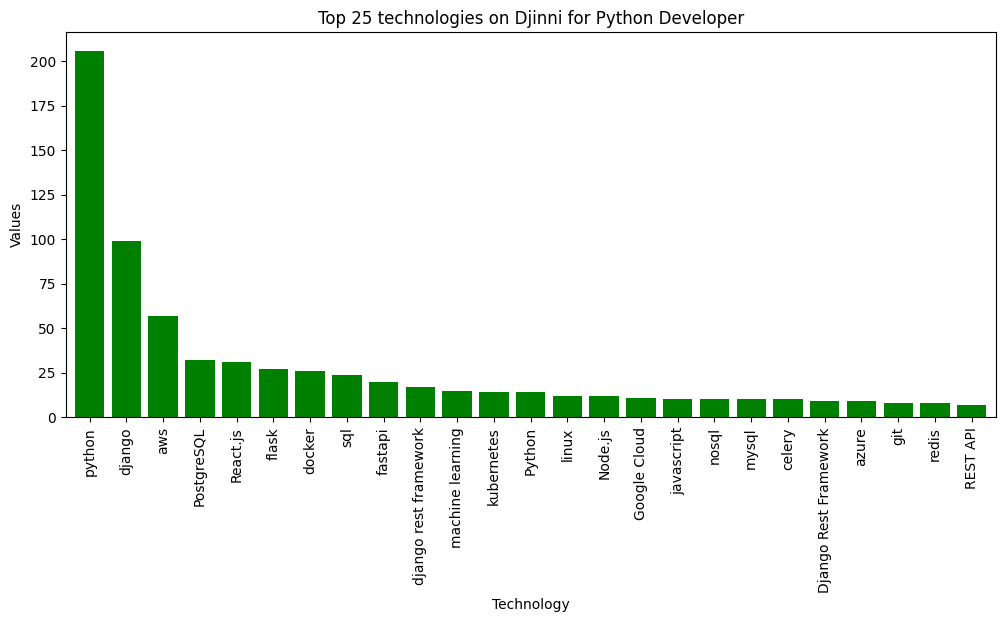

In [88]:
top_technologies = df_tags_test.sum()
plt.bar(top_technologies.index,top_technologies.values)
top_technologies.plot.bar(
    title="Top 25 technologies on Djinni for Python Developer",
    xlabel="Technology",
    ylabel="Values",
    width=0.8,
    color="g",
    figsize=(12,5),
    legend=False
)